<a href="https://colab.research.google.com/github/LerinaMM/central_de_atendimento_a_mulher/blob/main/violencia_contra_mulher_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Conectar o Dataset a partir do drive

In [1]:
!wget -P "/content/drive/MyDrive/Datasets/Violencia contra a mulher/segundo-semestre-2022.csv"

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [2]:
!wget -P "/content/drive/MyDrive/Datasets/Violencia contra a mulher/primeiro-semestre-2023.csv"

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


# 2 - Instalando o pacote pandas profiling para analisar o dataset

In [4]:
!pip install ydata-profiling

# 3 - Importar Bibliotecas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

#4 - Verificação de Dados

Utilizamos os dados do segundo semestre de 2022 e primeiro semestre de 2023

In [6]:
#Nomear o segundo conjunto de dados

dados_segundo = pd.read_csv('/content/drive/MyDrive/Datasets/Violencia contra a mulher/segundo-semestre-2022.csv', encoding='utf-8', delimiter=';')

In [7]:
#Nomear o terceiro conjunto de dados

dados_terceiro = pd.read_csv('/content/drive/MyDrive/Datasets/Violencia contra a mulher/primeiro-semestre-2023.csv', encoding='utf-8', delimiter=';')

In [8]:
#Primeiros dados do segundo conjunto

dados_segundo.head()

,hash,Data_de_cadastro,Canal_de_atendimento,Denúncia_emergencial,Denunciante,Cenário_da_violação,País,UF,Município,Frequência,...,Grau_de_instrução_do_suspeito,Religião_do_suspeito,Raça_Cor_do_suspeito,Suspeito_Etnia,Faixa_de_renda_do_suspeito,Vínculo_Órgão_PJ_do_suspeito,sl_suspeito_ramo,suspeito_especificacao_etnia,vitima_especificacao_etnia,violacao
0,A01A483FB2103B5AAF42FC37E45D3886E14B3528C46613...,2022-08-10 11:25:43.003,TELEFÔNICO,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,SP,355030 | SÃO PAULO,DIARIAMENTE,...,NaN,UMBANDA E CANDOMBLÉ,NaN,PARDO,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>TORTURA PSÍQUICA
1,709A353AC30598A075D04B296943139E71D5B08CEDDD1C...,2022-07-20 12:58:24.817,TELEFÔNICO,NÃO,A PRÓPRIA VÍTIMA,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,ES,320530 | VITÓRIA,DIARIAMENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FÍSICA>MAUS TRATOS
2,35FEA1E1B00682B804F734A31C51555BA62F2722B43588...,2022-10-30 20:53:36.507,TELEFÔNICO,NÃO,TERCEIRO,CASA DA VÍTIMA,BR | BRASIL,PR,410690 | CURITIBA,DIARIAMENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIREITOS SOCIAIS>PROTEÇÃO À INFÂNCIA
3,8D8F1E57FB1E3CE5AC979278CFF2DBA5AA53D42BF6B522...,2022-10-31 00:57:36.793,WHATSAPP,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,SP,350950 | CAMPINAS,DIARIAMENTE,...,NaN,NaN,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>NEGLIGÊNCIA
4,2B7EAE37453B5FDA047BAB89C542BEAD752B325142CAD6...,2022-10-14 13:39:51.817,WHATSAPP,NÃO,A PRÓPRIA VÍTIMA,CASA DO SUSPEITO,BR | BRASIL,BA,291840 | JUAZEIRO,NÃO SABE INFORMAR,...,NaN,NaN,PARDA,NaN,NaN,NaN,NaN,NaN,NaN,LIBERDADE>SEXUAL>FÍSICA>ESTUPRO


In [9]:
#Primeiros dados do terceiro conjunto

dados_terceiro.head()

,hash,Data_de_cadastro,Canal_de_atendimento,Denúncia_emergencial,Denunciante,Cenário_da_violação,País,UF,Município,Frequência,...,Grau_de_instrução_do_suspeito,Religião_do_suspeito,Raça_Cor_do_suspeito,Suspeito_Etnia,Faixa_de_renda_do_suspeito,Vínculo_Órgão_PJ_do_suspeito,sl_suspeito_ramo,suspeito_especificacao_etnia,vitima_especificacao_etnia,violacao
0,C544D154B72CE149B757BDA576FDDE2C6E964D2095E38A...,2023-01-16 13:10:49.980,TELEFÔNICO,NÃO,A PRÓPRIA VÍTIMA,CASA DA VÍTIMA,BR | BRASIL,RN,240800 | MOSSORÓ,OCASIONALMENTE,...,NaN,NaN,PRETA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>CONSTRANGIMENTO
1,7C0A5EABEFB042E97F2F6878F18350C9EB23D0E1424DA5...,2023-04-13 19:18:01.150,TELEFÔNICO,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,BA,292740 | SALVADOR,DIARIAMENTE,...,NaN,NaN,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>NEGLIGÊNCIA
2,5E7FAFF02AFF5A2F7F121FA78FE3472D039305DEC9C863...,2023-04-17 19:26:13.403,WHATSAPP,NÃO,A PRÓPRIA VÍTIMA,CASA DA VÍTIMA,BR | BRASIL,RJ,330455 | RIO DE JANEIRO,OCASIONALMENTE,...,NaN,NaN,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>INSUBSISTÊNCIA AFETIVA
3,4746DBA4CDE054A403FF1BCD40C520C8474FACBBE15495...,2023-03-18 17:19:59.397,TELEFÔNICO,NÃO,A PRÓPRIA VÍTIMA,LOCAL DE TRABALHO DA VÍTIMA,BR | BRASIL,BA,293305 | VÁRZEA DA ROÇA,DIARIAMENTE,...,NaN,NaN,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>CONSTRANGIMENTO
4,059F9A9FAF34A5C9C41CEDCF7F9DA3EFA6764CC9F3D632...,2023-04-03 12:58:00.647,TELEFÔNICO,NÃO,TERCEIRO,UNIDADE PRISIONAL,BR | BRASIL,ES,320520 | VILA VELHA,DIARIAMENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,"SEGURANÇA PÚBLICA, FORÇAS ARMADAS, DEFESA CIVI...",NaN,NaN,DIREITOS SOCIAIS>EDUCAÇÃO


#5.Tratamento dos dados fora de padrão dos conjuntos de dados

## 5.1 - Verificação se temos dados duplicados

In [10]:
dados_segundo.duplicated().sum()

0

In [11]:
dados_terceiro.duplicated().sum()

0

## 5.2 - Verificação as colunas que possuem valores integrais nulos

In [12]:
dados_segundo.isnull().sum()

hash                                  0
Data_de_cadastro                      0
Canal_de_atendimento                  0
Denúncia_emergencial                 41
Denunciante                           0
                                 ...   
Vínculo_Órgão_PJ_do_suspeito    1188349
sl_suspeito_ramo                1112307
suspeito_especificacao_etnia    1185749
vitima_especificacao_etnia      1137819
violacao                              0
Length: 62, dtype: int64

#6- Verificação da quantidade de dados dos conjuntos

In [13]:
dados_segundo.shape

(1188383, 62)

In [14]:
dados_segundo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188383 entries, 0 to 1188382
Data columns (total 62 columns):
 #   Column                                          Non-Null Count    Dtype 
---  ------                                          --------------    ----- 
 0   hash                                            1188383 non-null  object
 1   Data_de_cadastro                                1188383 non-null  object
 2   Canal_de_atendimento                            1188383 non-null  object
 3   Denúncia_emergencial                            1188342 non-null  object
 4   Denunciante                                     1188383 non-null  object
 5   Cenário_da_violação                             1183014 non-null  object
 6   País                                            1187362 non-null  object
 7   UF                                              1187247 non-null  object
 8   Município                                       1186983 non-null  object
 9   Frequência              

In [15]:
dados_terceiro.shape

(1666513, 62)

# 7- União dos dois conjuntos de dados

In [16]:
#Realizando a uniao dos dois conjuntos de dados

dados_unidos = pd.concat([dados_segundo, dados_terceiro], ignore_index=True)

print(dados_unidos)

                                                      hash  \
0        A01A483FB2103B5AAF42FC37E45D3886E14B3528C46613...   
1        709A353AC30598A075D04B296943139E71D5B08CEDDD1C...   
2        35FEA1E1B00682B804F734A31C51555BA62F2722B43588...   
3        8D8F1E57FB1E3CE5AC979278CFF2DBA5AA53D42BF6B522...   
4        2B7EAE37453B5FDA047BAB89C542BEAD752B325142CAD6...   
...                                                    ...   
2854891  C873F08A244D8011F3EFCE1F352F5FC5C5C27E21E109E2...   
2854892  3F80C715C84921A674255BCBC53D14009254B4E2ED4245...   
2854893  A41FB650C220111E81F1EA772D8642A80FA499D302BE7B...   
2854894  3A6EDE997B46991E32EB039376684BD0C5CCCFAB8C430F...   
2854895  8FFD995A735CCDEE294219F078F1F08097553C9CE44C77...   

                Data_de_cadastro Canal_de_atendimento  \
0        2022-08-10 11:25:43.003           TELEFÔNICO   
1        2022-07-20 12:58:24.817           TELEFÔNICO   
2        2022-10-30 20:53:36.507           TELEFÔNICO   
3        2022-10-31 00:57:3

In [17]:
# Mostrar as primeiras linhas do conjunto que foi unido

dados_unidos.head()

,hash,Data_de_cadastro,Canal_de_atendimento,Denúncia_emergencial,Denunciante,Cenário_da_violação,País,UF,Município,Frequência,...,Grau_de_instrução_do_suspeito,Religião_do_suspeito,Raça_Cor_do_suspeito,Suspeito_Etnia,Faixa_de_renda_do_suspeito,Vínculo_Órgão_PJ_do_suspeito,sl_suspeito_ramo,suspeito_especificacao_etnia,vitima_especificacao_etnia,violacao
0,A01A483FB2103B5AAF42FC37E45D3886E14B3528C46613...,2022-08-10 11:25:43.003,TELEFÔNICO,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,SP,355030 | SÃO PAULO,DIARIAMENTE,...,NaN,UMBANDA E CANDOMBLÉ,NaN,PARDO,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>TORTURA PSÍQUICA
1,709A353AC30598A075D04B296943139E71D5B08CEDDD1C...,2022-07-20 12:58:24.817,TELEFÔNICO,NÃO,A PRÓPRIA VÍTIMA,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,ES,320530 | VITÓRIA,DIARIAMENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FÍSICA>MAUS TRATOS
2,35FEA1E1B00682B804F734A31C51555BA62F2722B43588...,2022-10-30 20:53:36.507,TELEFÔNICO,NÃO,TERCEIRO,CASA DA VÍTIMA,BR | BRASIL,PR,410690 | CURITIBA,DIARIAMENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIREITOS SOCIAIS>PROTEÇÃO À INFÂNCIA
3,8D8F1E57FB1E3CE5AC979278CFF2DBA5AA53D42BF6B522...,2022-10-31 00:57:36.793,WHATSAPP,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,SP,350950 | CAMPINAS,DIARIAMENTE,...,NaN,NaN,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>NEGLIGÊNCIA
4,2B7EAE37453B5FDA047BAB89C542BEAD752B325142CAD6...,2022-10-14 13:39:51.817,WHATSAPP,NÃO,A PRÓPRIA VÍTIMA,CASA DO SUSPEITO,BR | BRASIL,BA,291840 | JUAZEIRO,NÃO SABE INFORMAR,...,NaN,NaN,PARDA,NaN,NaN,NaN,NaN,NaN,NaN,LIBERDADE>SEXUAL>FÍSICA>ESTUPRO


In [ ]:
# Mostrar as primeiras linhas do conjunto que foi unido

dados_unidos.tail()

,hash,Data_de_cadastro,Canal_de_atendimento,Denúncia_emergencial,Denunciante,Cenário_da_violação,País,UF,Município,Frequência,...,Grau_de_instrução_do_suspeito,Religião_do_suspeito,Raça_Cor_do_suspeito,Suspeito_Etnia,Faixa_de_renda_do_suspeito,Vínculo_Órgão_PJ_do_suspeito,sl_suspeito_ramo,suspeito_especificacao_etnia,vitima_especificacao_etnia,violacao
2854891,C873F08A244D8011F3EFCE1F352F5FC5C5C27E21E109E2...,2023-01-01 15:45:36.093,TELEFÔNICO,NÃO,A PRÓPRIA VÍTIMA,CASA DA VÍTIMA,BR | BRASIL,PE,261230 | SALOÁ,OCASIONALMENTE,...,NaN,NaN,PARDA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>AMEAÇA ou COAÇÃO
2854892,3F80C715C84921A674255BCBC53D14009254B4E2ED4245...,2023-03-29 15:39:12.107,TELEFÔNICO,RISCO IMINENTE DE MORTE DA VÍTIMA,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,RJ,330350 | NOVA IGUAÇU,DIARIAMENTE,...,NaN,NaN,PARDA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>NEGLIGÊNCIA
2854893,A41FB650C220111E81F1EA772D8642A80FA499D302BE7B...,2023-03-09 22:58:33.637,TELEFÔNICO,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,BA,293135 | TEIXEIRA DE FREITAS,DIARIAMENTE,...,NaN,NaN,PARDA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FÍSICA>EXPOSIÇÃO DE RISCO À SAÚDE
2854894,3A6EDE997B46991E32EB039376684BD0C5CCCFAB8C430F...,2023-05-17 12:52:57.820,TELEFÔNICO,NÃO,TERCEIRO,CASA DA VÍTIMA,BR | BRASIL,RS,431490 | PORTO ALEGRE,DIARIAMENTE,...,NaN,NaN,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FÍSICA>EXPOSIÇÃO DE RISCO À SAÚDE
2854895,8FFD995A735CCDEE294219F078F1F08097553C9CE44C77...,2023-05-17 00:05:44.487,TELEFÔNICO,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,US | ESTADOS UNIDOS,DENUNCIANTE NÃO SOUBE INFORMAR,NaN,DIARIAMENTE,...,NaN,NaN,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,DIREITOS SOCIAIS>PROTEÇÃO À INFÂNCIA


In [ ]:
#Vamos fazer um profiling dos Dados

profile = ProfileReport(dados_unidos, title="Profiling Report")

In [18]:
# Verificação de quantas linhas temos no conjunto após a eliminação dos dados repetidos.

dados_unidos.shape

(2854896, 62)

In [ ]:
dados_unidos.columns

Index(['hash', 'Data_de_cadastro', 'Canal_de_atendimento',
       'Denúncia_emergencial', 'Denunciante', 'Cenário_da_violação', 'País',
       'UF', 'Município', 'Frequência', 'Início_das_violações',
       'sl_quantidade_vitimas', 'Grupo_vulnerável', 'Motivação',
       'Relação_vítima_suspeito', 'sl_vitima_cadastro', 'Sexo_da_vítima',
       'Orientação_sexual_da_vítima', 'Faixa_etária_da_vítima',
       'Nacionalidade_da_vítima', 'sl_vitima_naturalidade',
       'sl_vitima_naturalizado_uf', 'sl_vitima_naturalizado_municipio',
       'Deficiência_da_vítima', 'Doença_rara_da_vítima',
       'Deficiência_relacionada_a_doença_rara', 'Vítima_preso_a',
       'País_da_vítima', 'UF_da_vítima', 'Município_da_vítima',
       'Profissão_da_vítima', 'Grau_de_instrução_da_vítima',
       'Religião_da_vítima', 'Raça_Cor_da_vítima', 'Etnia_da_vítima',
       'Faixa_de_renda_da_vítima', 'Natureza_Jurídica_do_Suspeito',
       'Sexo_do_suspeito', 'Orientação_sexual_do_suspeito',
       'Faixa_etári

In [ ]:
dados_unidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2854896 entries, 0 to 2854895
Data columns (total 62 columns):
 #   Column                                          Dtype 
---  ------                                          ----- 
 0   hash                                            object
 1   Data_de_cadastro                                object
 2   Canal_de_atendimento                            object
 3   Denúncia_emergencial                            object
 4   Denunciante                                     object
 5   Cenário_da_violação                             object
 6   País                                            object
 7   UF                                              object
 8   Município                                       object
 9   Frequência                                      object
 10  Início_das_violações                            object
 11  sl_quantidade_vitimas                           int64 
 12  Grupo_vulnerável                          

In [ ]:
#Verificação dos dados nulos

dados_unidos.isnull().sum()

hash                                  0
Data_de_cadastro                      0
Canal_de_atendimento                  0
Denúncia_emergencial                 41
Denunciante                         343
                                 ...   
Vínculo_Órgão_PJ_do_suspeito    2854862
sl_suspeito_ramo                2643839
suspeito_especificacao_etnia    2847405
vitima_especificacao_etnia      2731431
violacao                              0
Length: 62, dtype: int64

In [ ]:
#Fazer um drop (retirada) das colunas (Vínculo_Órgão_PJ_do_suspeito, sl_suspeito_ramo, suspeito_especificacao_etnia, vitima_especificacao_etnia)



In [ ]:
dados_unidos['violacao'].value_counts()

INTEGRIDADE>FÍSICA>EXPOSIÇÃO DE RISCO À SAÚDE                                                                                     283605
INTEGRIDADE>NEGLIGÊNCIA                                                                                                           269962
INTEGRIDADE>PSÍQUICA>TORTURA PSÍQUICA                                                                                             266816
INTEGRIDADE>FÍSICA>MAUS TRATOS                                                                                                    253405
INTEGRIDADE>PSÍQUICA>CONSTRANGIMENTO                                                                                              195735
                                                                                                                                   ...  
INTEGRIDADE>NEGLIGÊNCIA,LIBERDADE>SEXUAL>FÍSICA>EXPLORAÇÃO SEXUAL                                                                      1
INTEGRIDADE>FÍSICA>EXPOSIÇÃO DE RISCO À S

#8. Análise de Dados

##8.1 Canais de Atendimento

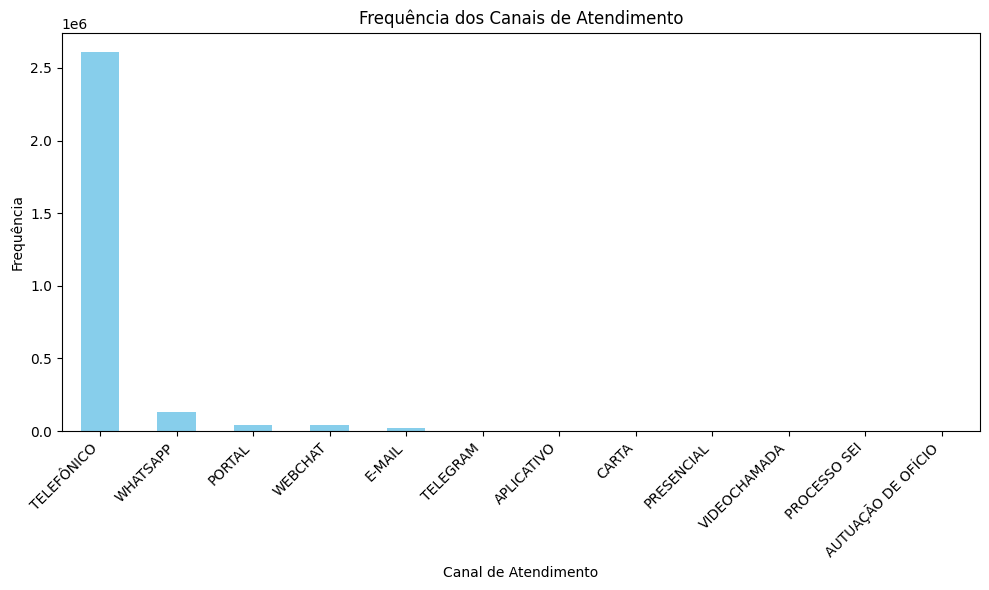

In [ ]:
# Canais de atendimento: Analise a coluna 'canal_atendimento' para identificar os canais mais utilizados pelas vítimas para denunciar a violência.
# Isso pode ajudar a avaliar a eficácia dos diferentes canais e direcionar recursos para melhorar o suporte em canais mais utilizados.

# Conte a frequência de cada canal de atendimento
canais_frequencia = dados_unidos['Canal_de_atendimento'].value_counts()

# Crie um gráfico de barras para visualizar a frequência dos canais de atendimento
plt.figure(figsize=(10, 6))
canais_frequencia.plot(kind='bar', color='skyblue')
plt.title('Frequência dos Canais de Atendimento')
plt.xlabel('Canal de Atendimento')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
dados_unidos['Canal_de_atendimento'].value_counts()

TELEFÔNICO            2611125
WHATSAPP               130465
PORTAL                  42761
WEBCHAT                 41731
E-MAIL                  19078
TELEGRAM                 3782
APLICATIVO               2589
CARTA                    2049
PRESENCIAL               1035
VIDEOCHAMADA              167
PROCESSO SEI               86
AUTUAÇÃO DE OFÍCIO         28
Name: Canal_de_atendimento, dtype: int64

Neste grafico mostra que as denuncias se devem na sua maioria, mais de 95% através de ligações por telefone no número 180.

Dessa forma, podemos explorar mais os outros canais, principalmente por whatsapp, já que não precisa falar e a vitima pode se sentir mais a vontade para fazer uma denuncia.

## 8.2 Perfil da Vítima

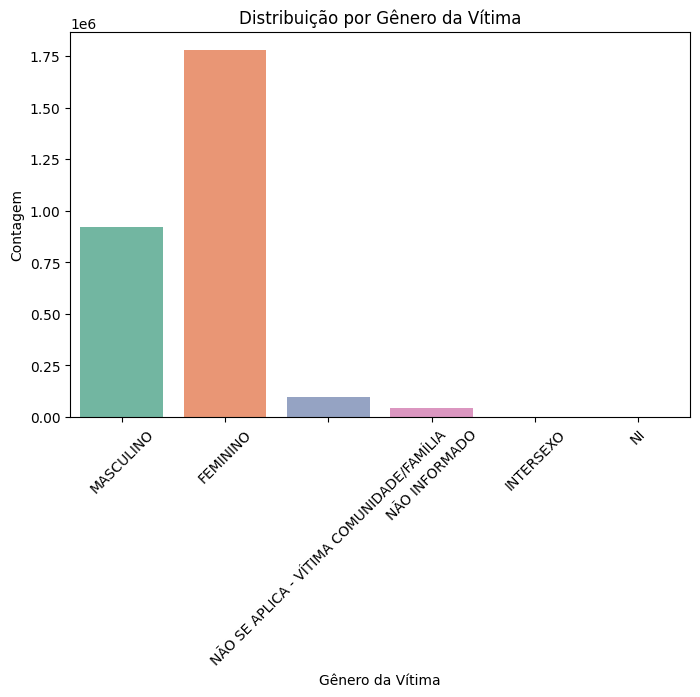

In [ ]:
# Gráfico de barras para o sexo da vítima

plt.figure(figsize=(8, 5))
sns.countplot(x='Sexo_da_vítima', data=dados_unidos, palette='Set2')
plt.title('Distribuição por Gênero da Vítima')
plt.xlabel('Gênero da Vítima')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

In [ ]:
dados_unidos['Sexo_da_vítima'].value_counts()

FEMININO                                     1777460
MASCULINO                                     923257
NÃO SE APLICA - VÍTIMA COMUNIDADE/FAMÍLIA      95553
NÃO INFORMADO                                  41764
INTERSEXO                                       1726
NI                                                 5
Name: Sexo_da_vítima, dtype: int64

#8.3 Faixa etaria da vítima

In [ ]:
#Faixa_etária_da_vítima

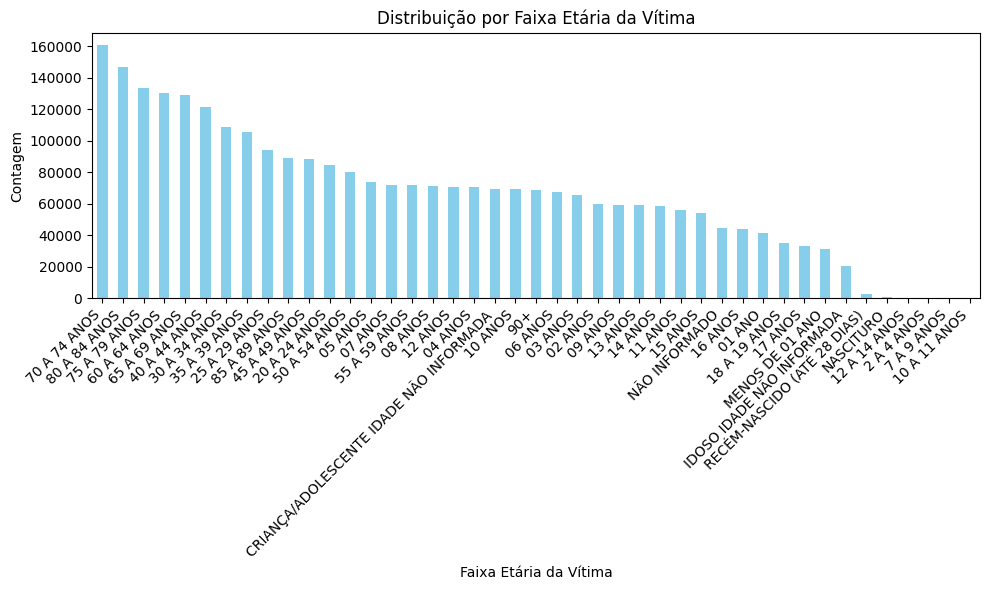

In [ ]:
# Remova os valores nulos da coluna 'faixa_etaria_vitima'
dados_unidos = dados_unidos.dropna(subset=['Faixa_etária_da_vítima'])

# Função para definir os intervalos de faixa etária
def definir_intervalo_faixa_etaria(idade):
    try:
        idade_int = int(idade)
        if idade_int < 100:  # Vamos considerar apenas idades menores que 100 para evitar erros
            inicio = idade_int // 10 * 10
            fim = inicio + 9
            return f"{inicio} a {fim} anos"
    except ValueError:
        return idade

# Aplica a função para criar os intervalos de faixa etária
dados_unidos['Faixa_etária_da_vítima'] = dados_unidos['Faixa_etária_da_vítima'].apply(definir_intervalo_faixa_etaria)

# Gráfico de barras para a faixa etária da vítima

plt.figure(figsize=(10, 6))
dados_unidos['Faixa_etária_da_vítima'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribuição por Faixa Etária da Vítima')
plt.xlabel('Faixa Etária da Vítima')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#8.4 Raça /cor da vítima

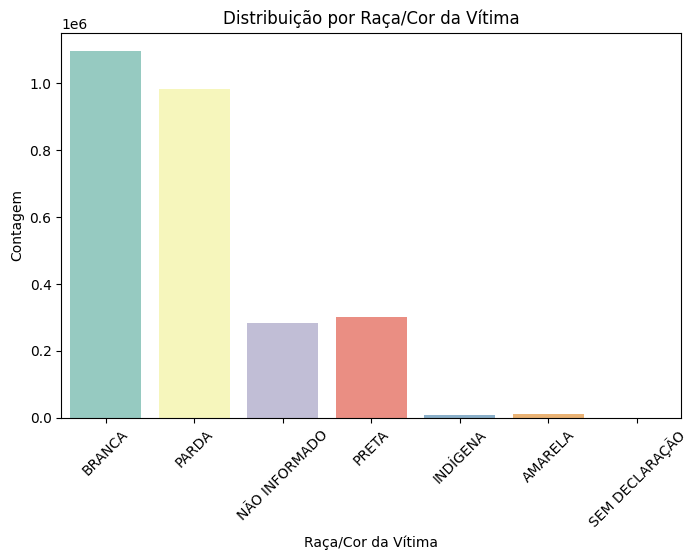

In [ ]:
# Gráfico de barras para a raça/cor da vítima

plt.figure(figsize=(8, 5))
sns.countplot(x='Raça_Cor_da_vítima', data=dados_unidos, palette='Set3')
plt.title('Distribuição por Raça/Cor da Vítima')
plt.xlabel('Raça/Cor da Vítima')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Tabela de frequência para a etnia da vítima

tabela_etnia = pd.crosstab(index=dados_unidos['Etnia_da_vítima'], columns='Contagem')
print(tabela_etnia)

col_0                                       Contagem
Etnia_da_vítima                                     
COMUNIDADES DE TERREIROS E MATRIZ AFRICANA       153
COMUNIDADES QUILOMBOLAS                           10
DEMAIS COMUNIDADES TRADICIONAIS                 2694
PARDO                                            398
POVOS CIGANOS                                     14
POVOS INDÍGENAS                                   79
PRETO                                            709


In [ ]:
# Tabela de frequência para a faixa de renda da vítima

tabela_renda = pd.crosstab(index=dados_unidos['Faixa_de_renda_da_vítima'], columns='Contagem')
print(tabela_renda)

col_0                             Contagem
Faixa_de_renda_da_vítima                  
ATÉ 1 SM                                23
ATÉ 1/2 SALÁRIO MÍNIMO              100890
MAIS DE 1 A 2 SALÁRIOS MÍNIMOS      141003
MAIS DE 1/2 A 1 SALÁRIO MÍNIMO      155611
MAIS DE 10 A 20 SALÁRIOS MÍNIMOS      4832
MAIS DE 2 A 5 SALÁRIOS MÍNIMOS       73243
MAIS DE 20 SALÁRIOS MÍNIMOS           1969
MAIS DE 5 A 10 SALÁRIOS MÍNIMOS      17064
SEM RENDIMENTO                       99185


#Principais cidades

In [ ]:
dados_unidos['Município_da_vítima'].value_counts()

355030 | SÃO PAULO          230494
330455 | RIO DE JANEIRO     165769
310620 | BELO HORIZONTE      67101
530010 | BRASÍLIA            60692
130260 | MANAUS              45281
                             ...  
430187 | BARRA DO QUARAÍ         1
510345 | DENISE                  1
250220 | BOM JESUS               1
316820 | TAPIRAÍ                 1
521480 | NOVA AURORA             1
Name: Município_da_vítima, Length: 5330, dtype: int64

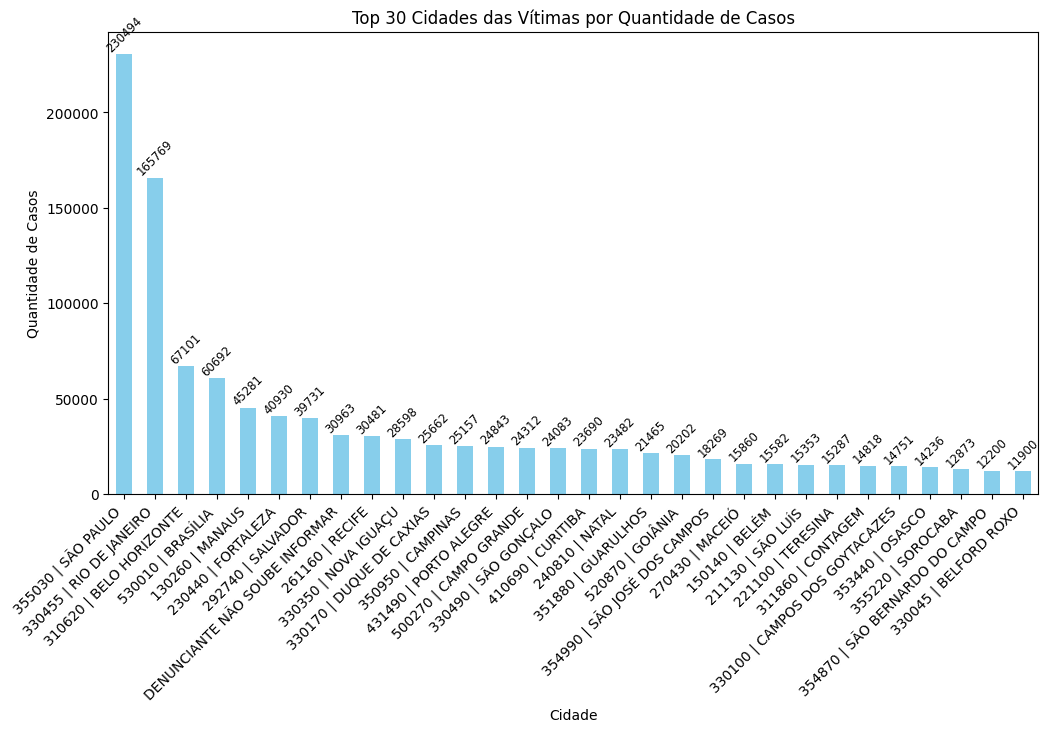

In [ ]:
# Use o método value_counts para contar a quantidade de casos em cada cidade das vítimas
top_cidades_vitimas = dados_unidos['Município_da_vítima'].value_counts().head(30)

# Exiba as 20 principais cidades das vítimas por quantidade de casos em um gráfico de barras
plt.figure(figsize=(12, 6))
top_cidades_vitimas.plot(kind='bar', color='skyblue')
plt.title('Top 30 Cidades das Vítimas por Quantidade de Casos')
plt.xlabel('Cidade')
plt.ylabel('Quantidade de Casos')
plt.xticks(rotation=45, ha='right')

# Adicionando os valores absolutos na parte superior da barra
for i, v in enumerate(top_cidades_vitimas.values):
    plt.text(i, v, v, ha='center', va='bottom', size='small', rotation=45)

# Mostrando o grafico
plt.show()


# Nuvem de palavras sobre as violações realizadas nas vitimas

In [ ]:
pip install wordcloud

In [ ]:
motivacao_str = dados_unidos["Motivação"].to_string()

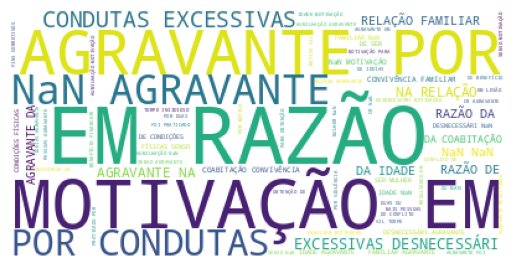

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Criando a nuvem de palavras
wordcloud = WordCloud(max_words=100, background_color="white").generate(motivacao_str)

#Grafico da nuvem de palavras
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Concluimos que nao conseguimos captar palavras relevantes através da coluna Motivação

# Vamos analisar a coluna Violação

In [ ]:
#Transformando a coluna Violação para string

violacao_str = dados_unidos["violacao"].to_string()

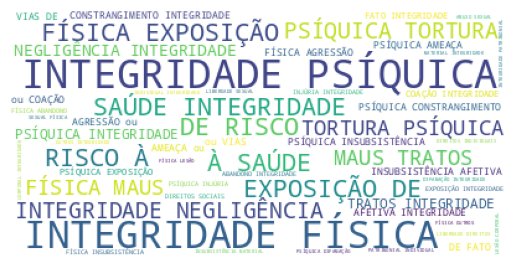

In [ ]:
# Criando a nuvem de palavras
wordcloud = WordCloud(max_words=100, background_color="white").generate(violacao_str)

# Criando o título da nuvem de palavras
wordcloud.title = "Violação Causada pelo agressor"

# Grafico da nuvem de palavras
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Vamos carregar um dataset de dados relacionando as denuncias relacionando com a população de cada estado

In [ ]:
!wget -P "/content/drive/MyDrive/Datasets/Violencia contra a mulher/pop_estados_brasileiros atualizado.csv"

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [ ]:
!wget -P "/content/drive/MyDrive/Datasets/Violencia contra a mulher/estados.csv"

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [ ]:
dados_populacao = pd.read_csv('/content/drive/MyDrive/Datasets/Violencia contra a mulher/pop_estados_brasileiros atualizado.csv')

In [ ]:
dados_estados = pd.read_csv('/content/drive/MyDrive/Datasets/Violencia contra a mulher/estados.csv')

In [ ]:
dados_populacao.head(30)

,estado,sigla,populacao_estado,denuncias,porcentagem
0,São Paulo,SP,44420459,740298,"1,67%"
1,Minas Gerais,MG,20538718,308011,"1,50%"
2,Rio de Janeiro,RJ,16054524,405848,"2,53%"
3,Bahia,BA,14136417,143734,"1,02%"
4,Paraná,PR,11443208,108045,"0,94%"
5,Rio Grande do Sul,RS,10880506,162621,"1,49%"
6,Pernambuco,PE,9058155,105950,"1,17%"
7,Ceará,CE,8791688,88750,"1,01%"
8,Pará,PA,8116132,48600,"0,60%"
9,Santa Catarina,SC,7609601,97276,"1,28%"


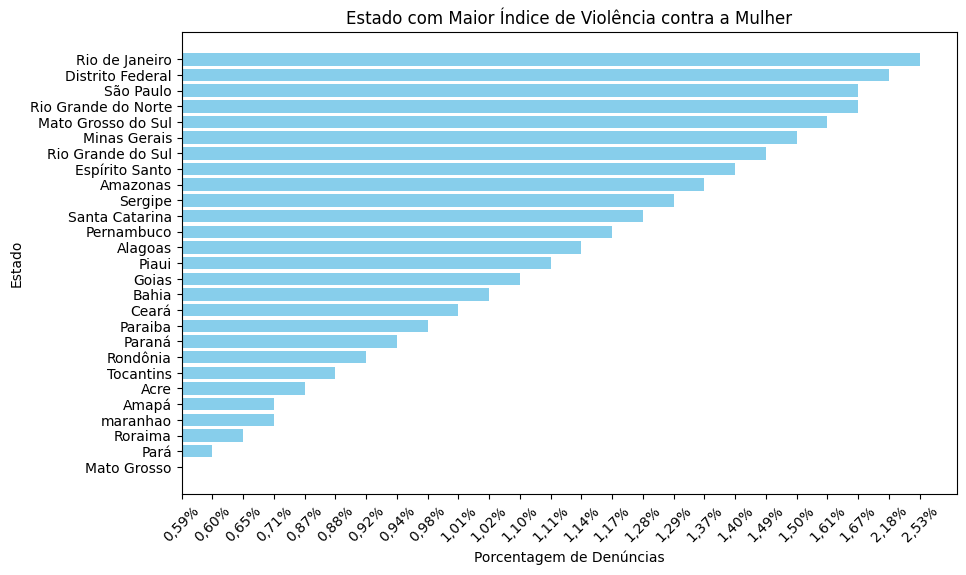

In [ ]:
# Ordenar o DataFrame pela coluna 'porcentagem' em ordem decrescente
dados_populacao = dados_populacao.sort_values(by='porcentagem', ascending=True)

# Criar o gráfico de barras horizontal

plt.figure(figsize=(10, 6))
plt.barh(dados_populacao['estado'], dados_populacao['porcentagem'], color='skyblue')
plt.xlabel('Porcentagem de Denúncias')
plt.ylabel('Estado')
plt.title('Estado com Maior Índice de Violência contra a Mulher')

# Adicionar ângulo de 45 graus nas etiquetas do eixo y (porcentagens)
plt.xticks(rotation=45)

plt.show()

#Frequência de denúncias: Vamos verificar a distribuição das denúncias ao longo do tempo para identificar tendências temporais e sazonalidades. Isso pode revelar padrões de aumento ou diminuição da violência em determinados períodos.

Verificando se a coluna "Data de Cadastro" esta com o formato de Datetime

In [ ]:
dados_unidos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2840486 entries, 0 to 2854895
Data columns (total 62 columns):
 #   Column                                          Dtype 
---  ------                                          ----- 
 0   hash                                            object
 1   Data_de_cadastro                                object
 2   Canal_de_atendimento                            object
 3   Denúncia_emergencial                            object
 4   Denunciante                                     object
 5   Cenário_da_violação                             object
 6   País                                            object
 7   UF                                              object
 8   Município                                       object
 9   Frequência                                      object
 10  Início_das_violações                            object
 11  sl_quantidade_vitimas                           int64 
 12  Grupo_vulnerável                          

In [ ]:
dados_unidos.head()

,hash,Data_de_cadastro,Canal_de_atendimento,Denúncia_emergencial,Denunciante,Cenário_da_violação,País,UF,Município,Frequência,...,Grau_de_instrução_do_suspeito,Religião_do_suspeito,Raça_Cor_do_suspeito,Suspeito_Etnia,Faixa_de_renda_do_suspeito,Vínculo_Órgão_PJ_do_suspeito,sl_suspeito_ramo,suspeito_especificacao_etnia,vitima_especificacao_etnia,violacao
0,A01A483FB2103B5AAF42FC37E45D3886E14B3528C46613...,2022-08-10 11:25:43.003,TELEFÔNICO,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,SP,355030 | SÃO PAULO,DIARIAMENTE,...,NaN,UMBANDA E CANDOMBLÉ,NaN,PARDO,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>TORTURA PSÍQUICA
1,709A353AC30598A075D04B296943139E71D5B08CEDDD1C...,2022-07-20 12:58:24.817,TELEFÔNICO,NÃO,A PRÓPRIA VÍTIMA,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,ES,320530 | VITÓRIA,DIARIAMENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FÍSICA>MAUS TRATOS
2,35FEA1E1B00682B804F734A31C51555BA62F2722B43588...,2022-10-30 20:53:36.507,TELEFÔNICO,NÃO,TERCEIRO,CASA DA VÍTIMA,BR | BRASIL,PR,410690 | CURITIBA,DIARIAMENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIREITOS SOCIAIS>PROTEÇÃO À INFÂNCIA
3,8D8F1E57FB1E3CE5AC979278CFF2DBA5AA53D42BF6B522...,2022-10-31 00:57:36.793,WHATSAPP,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,SP,350950 | CAMPINAS,DIARIAMENTE,...,NaN,NaN,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>NEGLIGÊNCIA
4,2B7EAE37453B5FDA047BAB89C542BEAD752B325142CAD6...,2022-10-14 13:39:51.817,WHATSAPP,NÃO,A PRÓPRIA VÍTIMA,CASA DO SUSPEITO,BR | BRASIL,BA,291840 | JUAZEIRO,NÃO SABE INFORMAR,...,NaN,NaN,PARDA,NaN,NaN,NaN,NaN,NaN,NaN,LIBERDADE>SEXUAL>FÍSICA>ESTUPRO


A coluna nao esta no formato, teremos que transformar

# Volume de denuncias contra a mulher durante o tempo

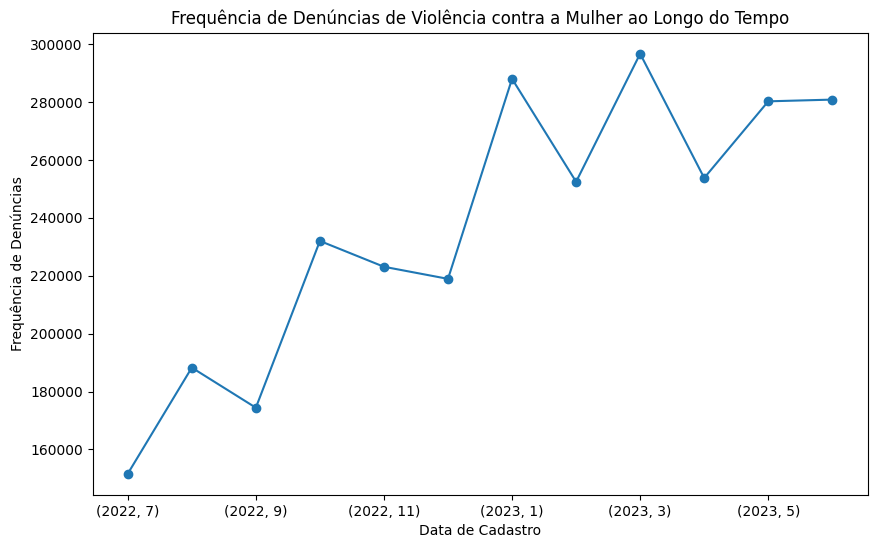

In [ ]:
# Transformando a coluna 'data_cadastro' está no formato datetime

dados_unidos['Data_de_cadastro'] = pd.to_datetime(dados_unidos['Data_de_cadastro'])

# Extração do ano e o mês da coluna 'Data_de_cadastro'

dados_unidos['ano'] = dados_unidos['Data_de_cadastro'].dt.year
dados_unidos['mes'] = dados_unidos['Data_de_cadastro'].dt.month

# Contagem do número de denúncias em cada mês
frequencia_denuncias = dados_unidos.groupby(['ano', 'mes']).size()

# Criação de um gráfico de linha para visualizar a frequência de denúncias ao longo do tempo

plt.figure(figsize=(10, 6))
frequencia_denuncias.plot(kind='line', marker='o')
plt.xlabel('Data de Cadastro')
plt.ylabel('Frequência de Denúncias')
plt.title('Frequência de Denúncias de Violência contra a Mulher ao Longo do Tempo')
plt.show()

In [ ]:
dados_unidos.head()

,hash,Data_de_cadastro,Canal_de_atendimento,Denúncia_emergencial,Denunciante,Cenário_da_violação,País,UF,Município,Frequência,...,Raça_Cor_do_suspeito,Suspeito_Etnia,Faixa_de_renda_do_suspeito,Vínculo_Órgão_PJ_do_suspeito,sl_suspeito_ramo,suspeito_especificacao_etnia,vitima_especificacao_etnia,violacao,ano,mes
0,A01A483FB2103B5AAF42FC37E45D3886E14B3528C46613...,2022-08-10 11:25:43.003,TELEFÔNICO,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,SP,355030 | SÃO PAULO,DIARIAMENTE,...,NaN,PARDO,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>TORTURA PSÍQUICA,2022,8
1,709A353AC30598A075D04B296943139E71D5B08CEDDD1C...,2022-07-20 12:58:24.817,TELEFÔNICO,NÃO,A PRÓPRIA VÍTIMA,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,ES,320530 | VITÓRIA,DIARIAMENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FÍSICA>MAUS TRATOS,2022,7
2,35FEA1E1B00682B804F734A31C51555BA62F2722B43588...,2022-10-30 20:53:36.507,TELEFÔNICO,NÃO,TERCEIRO,CASA DA VÍTIMA,BR | BRASIL,PR,410690 | CURITIBA,DIARIAMENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIREITOS SOCIAIS>PROTEÇÃO À INFÂNCIA,2022,10
3,8D8F1E57FB1E3CE5AC979278CFF2DBA5AA53D42BF6B522...,2022-10-31 00:57:36.793,WHATSAPP,NÃO,TERCEIRO,CASA ONDE RESIDE A VÍTIMA E O SUSPEITO,BR | BRASIL,SP,350950 | CAMPINAS,DIARIAMENTE,...,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>NEGLIGÊNCIA,2022,10
4,2B7EAE37453B5FDA047BAB89C542BEAD752B325142CAD6...,2022-10-14 13:39:51.817,WHATSAPP,NÃO,A PRÓPRIA VÍTIMA,CASA DO SUSPEITO,BR | BRASIL,BA,291840 | JUAZEIRO,NÃO SABE INFORMAR,...,PARDA,NaN,NaN,NaN,NaN,NaN,NaN,LIBERDADE>SEXUAL>FÍSICA>ESTUPRO,2022,10


In [ ]:
# Obter a primeira e a última data do dataset

primeira_data = dados_unidos['Data_de_cadastro'].min()
ultima_data = dados_unidos['Data_de_cadastro'].max()

print('Primeira data:', primeira_data)
print('Última data:', ultima_data)

Primeira data: 2022-07-01 00:05:22.993000
Última data: 2023-06-30 23:55:10.683000


#Analisando o Cenário da violação

In [ ]:
dados_unidos['Cenário_da_violação'].value_counts()

CASA ONDE RESIDE A VÍTIMA E O SUSPEITO                  1468247
CASA DA VÍTIMA                                           832081
CASA DO SUSPEITO                                         109089
VIA PÚBLICA                                               58755
AMBIENTE VIRTUAL (NO ÂMBITO DA INTERNET)                  50220
INSTITUIÇÃO DE ENSINO                                     47250
UNIDADE PRISIONAL                                         37302
OUTROS                                                    34022
ESTABELECIMENTO DE SAÚDE                                  28275
LOCAL DE TRABALHO DA VÍTIMA                               25853
CASA DE FAMILIARES                                        21823
ÓRGÃOS PÚBLICOS                                           20295
INSTITUIÇÃO DE LONGA PERMANÊNCIA DE IDOSO - ILPI          20169
ESTABELECIMENTO COMERCIAL                                 17093
LOCAL DE TRABALHO DO AGRESSOR                             11556
CASA DE TERCEIRO                        

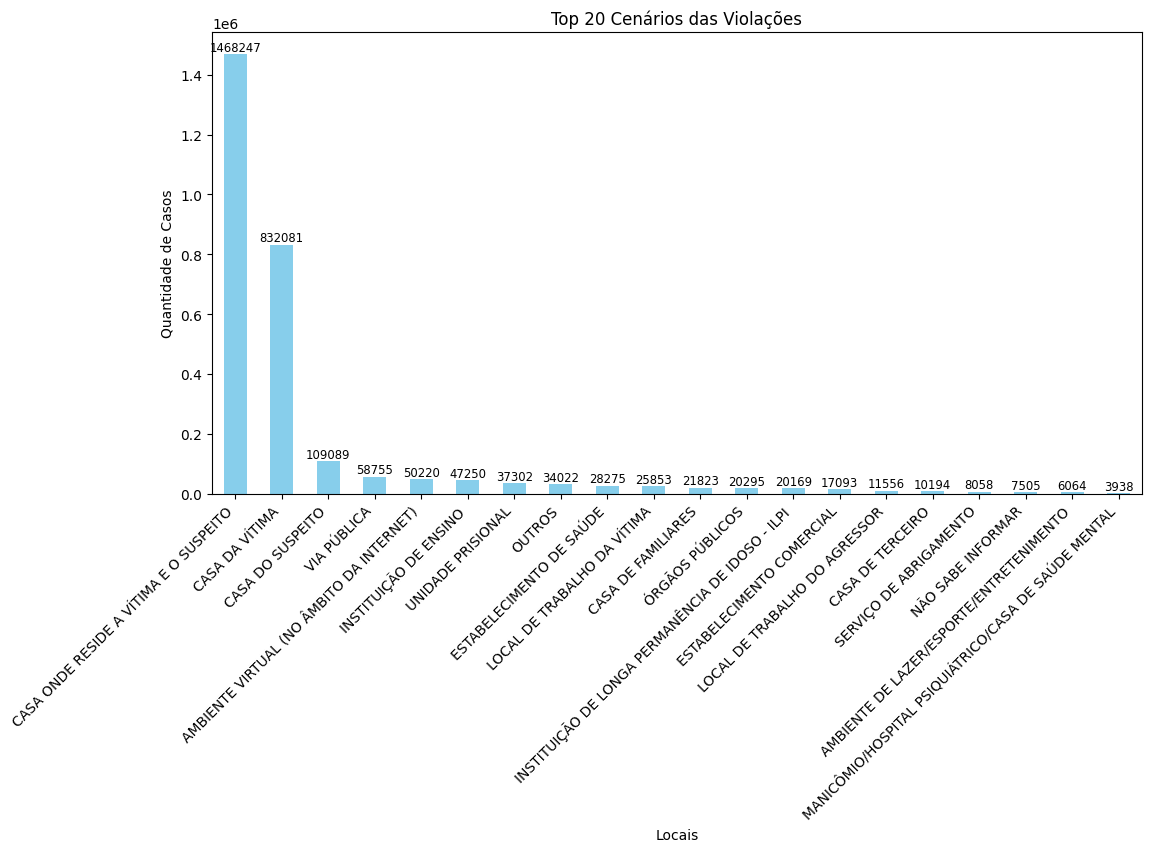

In [ ]:
# Use o método value_counts para contar a quantidade de denuncias nos cenários de violação
top_cenario_violacao = dados_unidos['Cenário_da_violação'].value_counts().head(20)

# Exibir as 20 principais locais onde as vitimas informam as denuncias
plt.figure(figsize=(12, 6))
top_cenario_violacao.plot(kind='bar', color='skyblue')
plt.title('Top 20 Cenários das Violações')
plt.xlabel('Locais')
plt.ylabel('Quantidade de Casos')
plt.xticks(rotation=45, ha='right')

# Adicionando os valores absolutos na parte superior da barra
for i, v in enumerate(top_cenario_violacao.values):
    plt.text(i, v, v, ha='center', va='bottom', size='small')

# Mostrando o grafico
plt.show()


# Horarios mais frequentes de denuncias

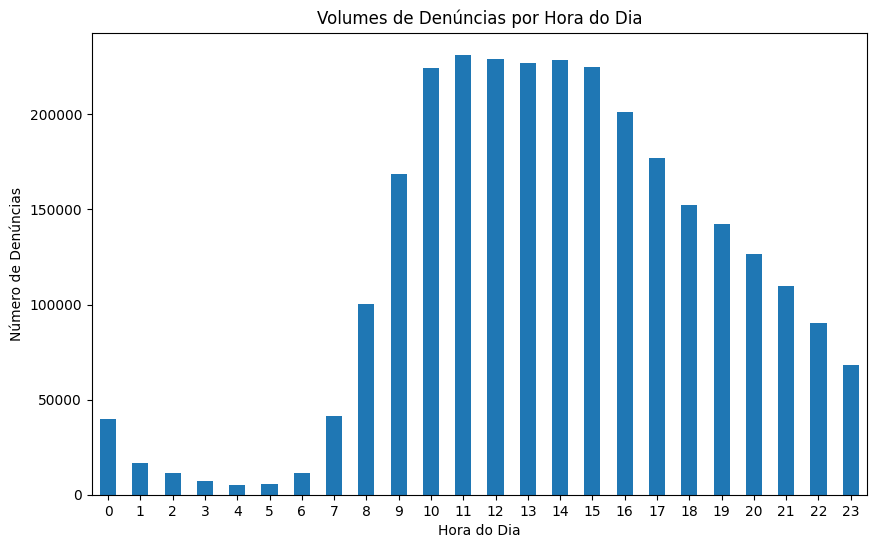

In [ ]:
# Extrair a hora da coluna 'data_cadastro'
dados_unidos['hora'] = dados_unidos['Data_de_cadastro'].dt.hour

# Calcular o número de denúncias para cada hora
denuncias_por_hora = dados_unidos['hora'].value_counts()

# Ordenar as horas em ordem crescente
denuncias_por_hora = denuncias_por_hora.sort_index()

# Plotar o gráfico de barras para visualizar os volumes de denúncias por hora
plt.figure(figsize=(10, 6))
denuncias_por_hora.plot(kind='bar')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Denúncias')
plt.title('Volumes de Denúncias por Hora do Dia')
plt.xticks(rotation=0)
plt.show()

Podemos notar que as denuncias ocorrem mais durante o dia entre os horarios das 10h as 16h

In [ ]:
dados_unidos['Frequência'].value_counts()

DIARIAMENTE          2029643
SEMANALMENTE          219373
OCASIONALMENTE        216501
NÃO SABE INFORMAR     168405
ÚNICA OCORRÊNCIA      161239
MENSALMENTE            35003
Name: Frequência, dtype: int64

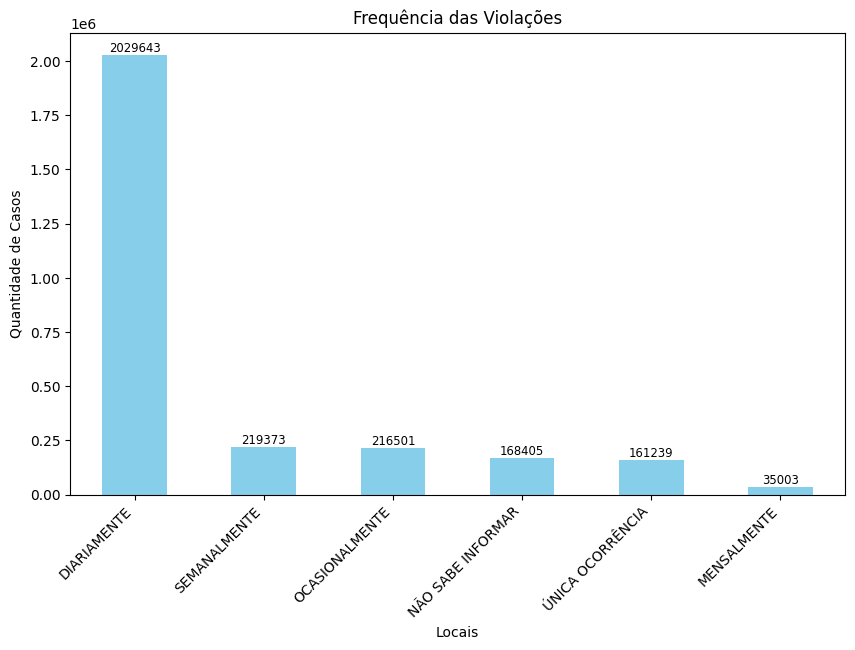

In [ ]:
# Use o método value_counts para contar a quantidade de denuncias nos cenários de violação
top_frequencia= dados_unidos['Frequência'].value_counts()

# Exibir as 20 principais locais onde as vitimas informam as denuncias
plt.figure(figsize=(10, 6))
top_frequencia.plot(kind='bar', color='skyblue')
plt.title('Frequência das Violações')
plt.xlabel('Locais')
plt.ylabel('Quantidade de Casos')
plt.xticks(rotation=45, ha='right')

# Adicionando os valores absolutos na parte superior da barra
for i, v in enumerate(top_frequencia.values):
    plt.text(i, v, v, ha='center', va='bottom', size='small')

# Mostrando o grafico
plt.show()

In [ ]:
# Extrair dados da coluna "relação_vitima_suspeito"

relacao_vitima_suspeito = dados_unidos['Relação_vítima_suspeito']

# Contar o numero de ocorrencias para cada relacionamento

relacao_count = relacao_vitima_suspeito.value_counts()

# Organização dos dados do maior para o menor

relacao_count.sort_values(ascending=False)

# Mostrar os 5 principais
print(relacao_count.head())

MÃE               644364
FILHO(A)          561842
PAI               217831
OUTROS            154975
COMPANHEIRO(A)    138848
Name: Relação_vítima_suspeito, dtype: int64


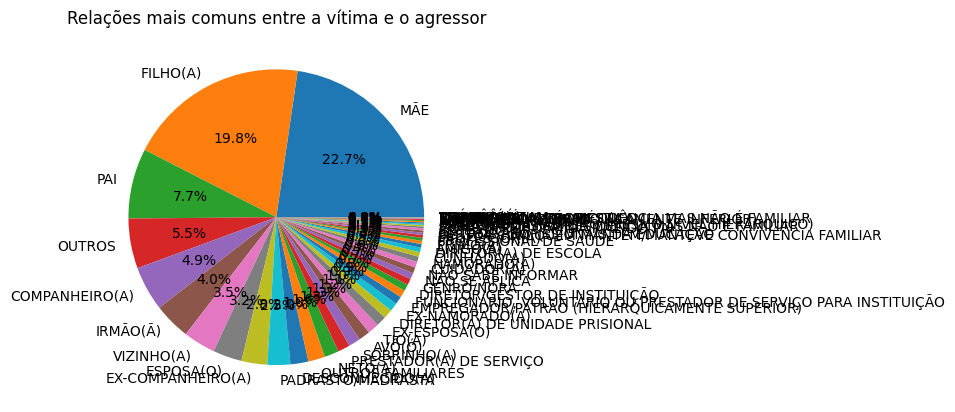

In [ ]:
# Criação do gráfico de pizza

plt.pie(relacao_count, labels=relacao_count.index, autopct='%1.1f%%')
plt.title('Relações mais comuns entre a vítima e o agressor')
plt.show()

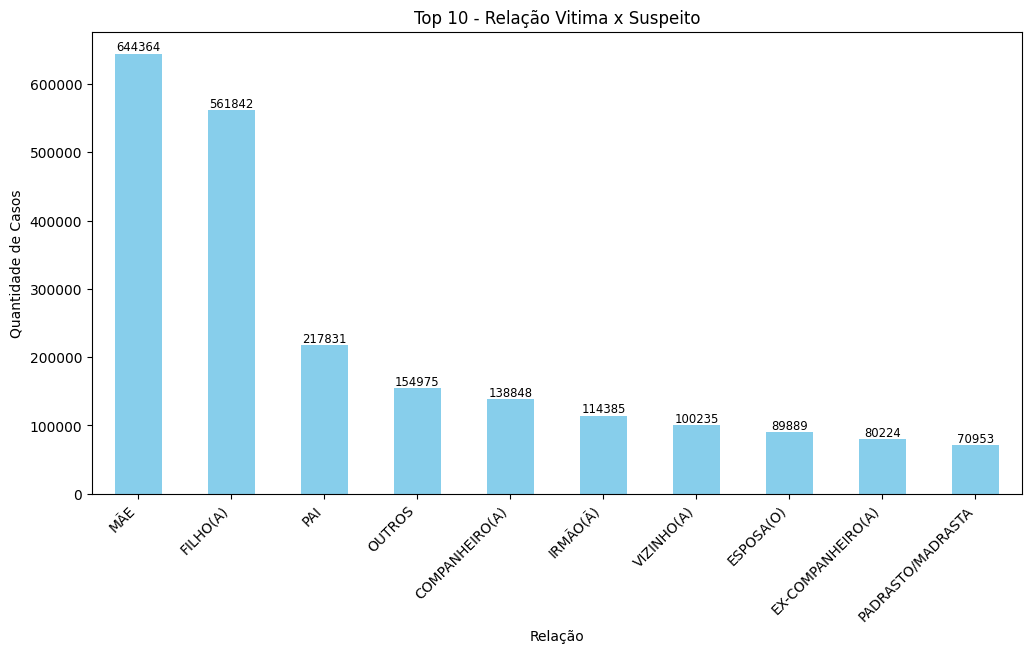

In [ ]:
# Use o método value_counts para contar a quantidade de denuncias nos cenários de violação
top_vitima_suspeito= dados_unidos['Relação_vítima_suspeito'].value_counts().head(10)

# Exibir as 20 principais locais onde as vitimas informam as denuncias
plt.figure(figsize=(12, 6))
top_vitima_suspeito.plot(kind='bar', color='skyblue')
plt.title('Top 10 - Relação Vitima x Suspeito')
plt.xlabel('Relação')
plt.ylabel('Quantidade de Casos')
plt.xticks(rotation=45, ha='right')

# Adicionando os valores absolutos na parte superior da barra
for i, v in enumerate(top_vitima_suspeito.values):
    plt.text(i, v, v, ha='center', va='bottom', size='small')

# Mostrando o grafico
plt.show()

In [ ]:
dados_data = dados_unidos.groupby('Data_de_cadastro').sum(numeric_only=True)

In [ ]:
dados_data


,sl_quantidade_vitimas,ano,mes,hora
Data_de_cadastro,,,,
2022-07-01 00:05:22.993,7,14154,49,0
2022-07-01 00:13:36.220,6,12132,42,0
2022-07-01 00:14:07.630,1,2022,7,0
2022-07-01 00:17:03.277,11,22242,77,0
2022-07-01 00:19:39.220,26,26286,91,0
...,...,...,...,...
2023-06-30 23:48:47.547,4,8092,24,92
2023-06-30 23:51:09.190,14,28322,84,322
2023-06-30 23:51:26.857,5,10115,30,115


In [ ]:
dados_data['Data_de_cadastro']= pd.to_datetime(dados_data['Data_de_cadastro'])

KeyError: ignored

In [ ]:
dados_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 318167 entries, 2022-07-01 00:05:22.993000 to 2023-06-30 23:55:10.683000
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   sl_quantidade_vitimas  318167 non-null  int64
 1   ano                    318167 non-null  int64
 2   mes                    318167 non-null  int64
 3   hora                   318167 non-null  int64
dtypes: int64(4)
memory usage: 12.1 MB
